2-A Correlation coefficients and Principal Component Analysis

i) Select a set of 1,2,3,...26 features by checking which of these features show a 
maximum linear relationship with the target attribute by using Pearson correlation 
coefficient. Use these features to build the regression model and find the training 
and testing error for each set of features.

ii) Perform Principal component analysis to select a set of 1,2,3,...26 principal 
components. Use these features to build the regression model and find the training 
and testing error for each set of features. Also find the percentage of variance 
captured by each of the feature sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("C://Datasets//FODS-A2.csv")
df1.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,21.20,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.73,19.200000,39.363333,...,29.230000,9.85,756.183333,41.833333,4.833333,40.0,-2.67,42.017180,42.017180,290
1,21.79,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.90,20.033333,47.290000,...,40.326667,6.90,754.000000,75.000000,4.000000,40.0,2.80,24.624380,24.624380,50
2,22.39,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.26,19.390000,48.090000,...,42.060000,10.10,756.433333,68.000000,5.833333,40.0,4.45,3.731260,3.731260,260
3,24.00,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.20,21.033333,40.626667,...,35.500000,19.10,760.000000,31.000000,4.000000,40.0,1.50,1.058826,1.058826,50
4,20.05,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.40,18.200000,43.560000,...,38.863333,0.10,754.600000,99.000000,1.000000,32.0,-0.10,39.248108,39.248108,30


In [3]:

df = df1.drop(['rv2'],axis=1)
df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,Appliances
0,21.20,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.73,19.200000,39.363333,...,18.79,29.230000,9.85,756.183333,41.833333,4.833333,40.0,-2.67,42.017180,290
1,21.79,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.90,20.033333,47.290000,...,20.60,40.326667,6.90,754.000000,75.000000,4.000000,40.0,2.80,24.624380,50
2,22.39,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.26,19.390000,48.090000,...,19.76,42.060000,10.10,756.433333,68.000000,5.833333,40.0,4.45,3.731260,260
3,24.00,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.20,21.033333,40.626667,...,20.79,35.500000,19.10,760.000000,31.000000,4.000000,40.0,1.50,1.058826,50
4,20.05,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.40,18.200000,43.560000,...,17.50,38.863333,0.10,754.600000,99.000000,1.000000,32.0,-0.10,39.248108,30


In [4]:
X = df.loc[:,df.columns != "Appliances"]
Y = df["Appliances"]
Y.head()

0    290
1     50
2    260
3     50
4     30
Name: Appliances, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
x_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
7283,24.10,40.40,21.700000,42.245000,25.390000,39.700000,24.000000,39.626667,21.2675,38.8725,...,46.076000,22.50,41.766667,8.80,758.100000,86.000000,1.000000,29.000000,6.5,21.898525
491,20.00,33.60,19.066667,33.466667,19.993333,34.226667,19.963333,32.766667,18.2000,46.5300,...,36.530000,19.50,37.363333,2.20,768.800000,81.000000,7.000000,65.000000,-0.8,33.112977
3196,22.89,40.79,20.500000,43.678000,24.600000,37.378000,23.000000,37.700000,22.7000,41.7900,...,41.200000,22.79,42.455714,8.27,761.033333,88.333333,1.666667,26.333333,6.4,10.198997
729,24.20,41.59,25.614286,35.712857,26.390000,37.590000,24.500000,39.966667,21.7900,47.9250,...,43.290000,22.60,43.363333,20.20,756.600000,50.000000,3.000000,26.000000,9.4,1.384248
617,21.50,39.50,19.066667,42.466667,22.290000,38.900000,20.200000,38.500000,19.7000,51.3175,...,47.826667,19.39,43.000000,6.10,754.700000,97.000000,4.000000,39.000000,5.6,3.353874


In [6]:
row_means = []

for col in x_train.columns:
    row_means.append(x_train[col].mean())
    x_train[col] = x_train[col] - x_train[col].mean()

x_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
7283,2.421599,0.179697,1.352290,1.896587,3.123809,0.502010,3.132346,0.664086,1.678386,-11.982193,...,3.217683,3.015033,0.256971,1.380927,2.482676,6.539152,-3.053689,-9.244031,2.786076,-2.956175
491,-1.678401,-6.620303,-1.281043,-6.881746,-2.272857,-4.971323,-0.904321,-6.195914,-1.389114,-4.324693,...,-6.328317,0.015033,-4.146362,-5.219073,13.182676,1.539152,2.946311,26.755969,-4.513924,8.258277
3196,1.211599,0.569697,0.152290,3.329587,2.333809,-1.819990,2.132346,-1.262580,3.110886,-9.064693,...,-1.658317,3.305033,0.946019,0.850927,5.416009,8.872486,-2.387022,-11.910698,2.686076,-14.655702
729,2.521599,1.369697,5.266576,-4.635556,4.123809,-1.607990,3.632346,1.004086,2.200886,-2.929693,...,0.431683,3.115033,1.853638,12.780927,0.982676,-29.460848,-1.053689,-12.244031,5.686076,-23.470452
617,-0.178401,-0.720303,-1.281043,2.118254,0.023809,-0.297990,-0.667654,-0.462580,0.110886,0.462807,...,4.968350,-0.094967,1.490305,-1.319073,-0.917324,17.539152,-0.053689,0.755969,1.886076,-21.500826


In [7]:
i = 0
for col in x_test.columns:
    x_test[col] = x_test[col] - row_means[i]
    i = i + 1

x_test.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
7275,-0.888401,5.039697,-0.347710,5.441587,-0.666191,3.00201,1.392346,6.037420,0.333743,38.712450,...,9.438350,-1.194967,5.890305,3.580927,0.932676,12.039152,4.112978,21.755969,5.866076,0.325159
6014,0.421599,-3.130303,-0.557710,-1.548413,-1.066191,-1.60799,0.522346,-4.435914,-0.765780,18.811974,...,-5.631650,-1.384967,-1.576362,-3.719073,6.516009,1.539152,-2.053689,23.422636,-3.013924,-17.276267
1912,-0.948401,-2.520303,-2.557710,1.151587,0.867143,-2.49799,-1.404321,-1.995914,-0.232447,-4.264693,...,-0.568317,-0.384967,-0.883029,-3.919073,8.382676,12.539152,-1.053689,-14.244031,-1.413924,9.616023
5050,-0.288401,3.679697,0.352290,1.941587,-0.476191,6.30201,0.132346,6.627420,0.110886,13.309752,...,9.267794,-1.384967,6.853638,-2.949073,2.632676,8.872486,-0.053689,-8.244031,-1.063924,8.280311
1711,0.021599,4.309697,-0.384376,6.314920,0.833809,2.59201,0.132346,4.827420,0.200886,-1.154693,...,8.575017,1.015033,6.616971,4.480927,-7.567324,10.539152,-0.053689,-6.744031,6.586076,19.936704


In [8]:
x_data = np.asarray(x_train)
print(x_data)

[[  2.42159878   0.17969665   1.35229022 ...  -9.24403097   2.78607561
   -2.9561751 ]
 [ -1.67840122  -6.62030335  -1.28104311 ...  26.75596903  -4.51392439
    8.25827735]
 [  1.21159878   0.56969665   0.15229022 ... -11.91069764   2.68607561
  -14.6557023 ]
 ...
 [ -0.11173455   0.97969665  -1.24770978 ...  23.58930236  -0.38392439
    0.78435172]
 [ -0.17840122   1.17969665   0.35229022 ... -15.74403097  -2.28392439
   11.14750725]
 [ -0.97840122   0.37969665  -2.52437645 ... -16.74403097  -1.06392439
  -19.95134229]]


In [9]:
x_data_test = np.asarray(x_test)
print(x_data_test)

[[ -0.88840122   5.03969665  -0.34770978 ...  21.75596903   5.86607561
    0.32515862]
 [  0.42159878  -3.13030335  -0.55770978 ...  23.4226357   -3.01392439
  -17.2762673 ]
 [ -0.94840122  -2.52030335  -2.55770978 ... -14.24403097  -1.41392439
    9.61602278]
 ...
 [ -0.85506789  -4.93030335  -2.84770978 ...  19.58930236  -4.39692439
   23.71272005]
 [  0.55159878  -5.89363668  -0.14770978 ...   1.75596903  -2.18392439
   -9.71470247]
 [  1.74826545  -3.36030335   2.84829022 ...   1.75596903  -0.71392439
   -1.88095693]]


In [10]:
y_data = np.asarray(y_train)
y_data

array([ 50, 740, 160, ...,  70,  70,  70], dtype=int64)

In [11]:
y_data_test = np.asarray(y_test)
y_data_test

array([ 80,  80,  50, ...,  30,  40, 120], dtype=int64)

Seperating more data for Cross-Validation

In [12]:
x_valid, x_valid_test, y_valid, y_valid_test = train_test_split(x_train, y_train, test_size=0.2, random_state=2)

In [13]:
x_valid_data = np.asarray(x_valid)
print(x_valid_data)

[[  0.21159878  -3.43030335  -1.55770978 ...   1.75596903  -2.74692439
  -13.21267473]
 [  0.71159878  -3.02030335  -0.14770978 ...  -0.0773643    0.28607561
   -7.80350121]
 [  0.21159878  -4.75363668  -0.95770978 ... -15.74403097  -2.31392439
  -23.1122223 ]
 ...
 [  2.02159878   3.44302998   2.10829022 ... -10.24403097   7.08607561
   12.5466764 ]
 [ -3.21506789   2.06969665  -2.58770978 ... -15.24403097   0.43607561
  -19.25274357]
 [ -1.57840122   3.47969665  -0.74770978 ...   1.75596903   2.51607561
   -3.18380719]]


In [14]:
x_valid_data_test = np.asarray(x_valid_test)
print(x_valid_data_test)

[[-2.17840122  0.74636332 -1.74770978 ...  1.75596903 -4.88392439
  19.104319  ]
 [ 0.35493211  1.07302998  0.75229022 ... -5.5773643   4.08607561
  11.06805612]
 [ 0.82159878  2.17969665 -0.14770978 ...  1.75596903  1.68607561
  11.87477501]
 ...
 [-1.57840122 -2.93030335 -3.24770978 ...  1.75596903 -4.13092439
  -8.11133742]
 [ 0.71159878 -1.59363668  5.18562355 ...  1.75596903 -1.01392439
   6.89102213]
 [ 0.11159878  4.47969665  0.59729022 ...  8.08930236  4.28607561
  17.17070856]]


In [15]:
y_valid_data = np.asarray(y_valid)
print(y_valid_data)

[ 70  80 120 ... 290  20  60]


In [16]:
y_valid_data_test = np.asarray(y_valid_test)
print(y_valid_data_test)

[280  80  50 ...  50  50  40]


In [17]:
variables = list(x_train)
variables

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1']

Checking Linear Relationship of Each variable with the target attribute

In [18]:
coeff_mat = []
for i in range(0,25):
    var = x_data[:,i]
    coeff_mat.append(np.corrcoef(var, y_data)[0,1])

corr_coeff_df = pd.DataFrame(coeff_mat,columns=["Correlation Coefficients"],index=variables)
corr_coeff_df

,Correlation Coefficients
T1,0.046837
RH_1,0.073984
T2,0.108182
RH_2,-0.066643
T3,0.076273
RH_3,0.028431
T4,0.036171
RH_4,0.009868
T5,0.013707
RH_5,0.020321


In [19]:
def calculateError(train_data, w_degree):
    train_pred = np.dot(train_data, w_degree)
    d = train_pred - y_data
    error = np.dot(d.T,d)

    e_rms = (error/len(train_data))**0.5

    return e_rms

In [20]:
abs_corr = np.abs(np.asarray(coeff_mat))
training_errors = []
w_train = []

for i in range(1,26):
    indices = np.argpartition(abs_corr, -i)[-i:]

    x_data_by_corr = x_data[:,indices]

    w_req = np.dot(np.dot(np.linalg.inv(np.dot(x_data_by_corr.T,x_data_by_corr)),x_data_by_corr.T),y_data)
    w_train.append(w_req)  
    training_errors.append(calculateError(x_data_by_corr, w_req))

# training_errors = []
# for sublist in model_error: 
#      for item in sublist: 
#          training_errors.append(item)

training_errors_df = pd.DataFrame(training_errors, columns=["Training Errors"])
training_errors_df.index = np.arange(1, len(training_errors_df) + 1)
training_errors_df

,Training Errors
1,141.267756
2,141.225722
3,141.211533
4,141.021656
5,141.010095
6,140.791863
7,140.432910
8,139.984289
9,139.078704
10,138.016240


In [21]:
def calculateErrorTest(test_data, w_train_degree):
    test_pred = np.dot(test_data, w_train_degree)
    d = test_pred - y_data_test
    error = np.dot(d.T,d)

    e_rms = (error/len(test_data))**0.5

    return e_rms

In [22]:
testing_errors = []

for i in range(1,26):
    indices = np.argpartition(abs_corr, -i)[-i:]

    x_data_by_corr_test = x_data_test[:,indices]
    testing_errors.append(calculateErrorTest(x_data_by_corr_test,w_train[i-1]))

# testing_errors = []
# for sublist in test_error: 
#      for item in sublist: 
#          testing_errors.append(item)


testing_errors_df = pd.DataFrame(testing_errors, columns=["Testing Errors"])
testing_errors_df.index = np.arange(1, len(training_errors_df) + 1)
testing_errors_df

,Testing Errors
1,146.779739
2,146.715229
3,146.716650
4,146.687403
5,146.674157
6,146.351152
7,146.377692
8,145.319430
9,144.230708
10,142.945030


Text(0, 0.5, 'Errors')

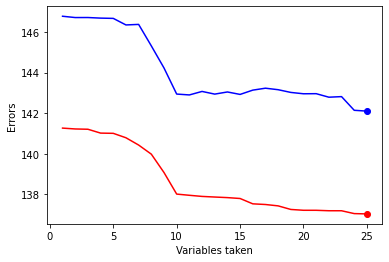

In [23]:
variables_taken = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

min_train = np.argmin(training_errors)
min_test = np.argmin(testing_errors)

plt.plot(variables_taken, training_errors, color="red", label="training errors")
plt.scatter(variables_taken[min_train], training_errors[min_train], color="red")
plt.plot(variables_taken, testing_errors, color="blue", label="testing errors")
plt.scatter(variables_taken[min_test], testing_errors[min_test], color="blue")

plt.xlabel("Variables taken")
plt.ylabel("Errors")

Now We will be using Principal Component Analysis to build models

In [24]:
cov_mat = np.cov(x_data, rowvar=False)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2.652877,1.189107,3.036333,0.098906,2.959406,-0.041914,2.964032,0.849641,2.728947,0.004337,...,0.168492,2.813492,0.602615,5.999020,-1.841867,-8.167966,-0.353697,-1.227571,4.036393,-0.053488
1,1.189107,15.881908,2.487423,12.961859,2.134339,11.083019,1.001074,15.450509,1.578352,10.900475,...,15.563559,1.009757,12.778293,7.478736,-8.015146,16.569609,1.845247,-1.316115,10.962927,0.683352
2,3.036333,2.487423,4.975146,-1.465119,3.343448,0.951128,3.538099,2.354824,3.043867,0.813792,...,1.002047,3.089227,1.528339,9.522340,-2.102091,-16.614683,0.238525,-1.563784,5.625415,-0.296269
3,0.098906,12.961859,-1.465119,16.766850,1.178887,9.181920,-0.309382,13.007216,0.855637,9.264716,...,14.720939,0.494069,11.601102,0.772053,-7.298596,36.131970,0.552967,-0.676073,8.652704,1.220251
4,2.959406,2.134339,3.343448,1.178887,4.115378,0.045346,3.579657,1.242411,3.399197,-0.817698,...,0.717865,3.720978,1.230596,7.620187,-2.897547,-8.380638,-0.512798,-2.260689,5.602629,0.068916
5,-0.041914,11.083019,0.951128,9.181920,0.045346,10.740005,-0.822998,12.962254,-0.260016,10.914371,...,14.334244,-1.194767,11.455870,2.325131,-5.227052,17.898177,1.907016,0.562637,6.041482,0.532102
6,2.964032,1.001074,3.538099,-0.309382,3.579657,-0.822998,4.279851,-0.268500,3.416257,-1.251521,...,-0.786256,3.756491,-0.087019,7.431555,-1.291952,-11.950710,-0.910914,-2.244920,4.651027,-0.135750
7,0.849641,15.450509,2.354824,13.007216,1.242411,12.962254,-0.268500,19.217840,0.815897,13.785302,...,19.614521,-0.266520,15.682539,7.096161,-7.453941,22.580726,2.978572,-0.139004,11.678840,0.976216
8,2.728947,1.578352,3.043867,0.855637,3.399197,-0.260016,3.416257,0.815897,3.557469,0.695351,...,0.278020,3.521642,0.606287,6.619172,-2.384016,-7.805491,-0.678402,-1.588992,4.720158,0.004838
9,0.004337,10.900475,0.813792,9.264716,-0.817698,10.914371,-1.251521,13.785302,0.695351,81.079106,...,16.582862,-2.346891,10.207657,-1.520944,-6.985291,23.481771,1.626355,-2.565514,3.577542,-1.695925


In [25]:
Var = ["Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8","Var9","Var10","Var11","Var12","Var13","Var14","Var15","Var16","Var17","Var18","Var19","Var20","Var21","Var22","Var23","Var24","Var25"]

eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
total_variance = np.sum(eigen_values,axis=0,dtype=float)
pd.DataFrame(eigen_values,columns=["Eigenvalues"])
# eigen_vectors

,Eigenvalues
0,1181.442358
1,206.300684
2,156.928928
3,132.984437
4,99.687071
5,65.515338
6,47.774244
7,11.495474
8,7.820884
9,7.500422


In [26]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_index
# sorted_eigen_values = eigen_values[sorted_index]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 24, 23], dtype=int64)

In [27]:
sorted_eigen_values = eigen_values[sorted_index] 
sorted_eigen_vectors = eigen_vectors[:,sorted_index] #sorted with Var1 having highest eignevalue
pd.DataFrame(sorted_eigen_vectors,index=Var).rename_axis("Eigenvectors", axis="columns")

Eigenvectors,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Var1,0.027945,-0.002013,0.059228,0.026600,0.011849,-0.003631,-0.002351,0.115378,0.235771,0.144302,...,-0.076335,-0.051158,-0.190591,-0.165449,0.324480,-0.198391,-0.363971,0.303652,-0.014671,0.638100
Var2,-0.031490,-0.002367,0.248340,0.082767,-0.058234,-0.082668,0.059439,-0.247583,0.246381,-0.348806,...,0.212031,0.387019,0.042469,-0.115057,-0.066705,-0.028500,0.090150,0.125534,0.015679,0.137917
Var3,0.038321,-0.001414,0.083613,0.035926,-0.051495,-0.027038,0.018002,0.181760,0.134921,0.211897,...,0.057744,0.055991,-0.128076,-0.023785,0.204127,-0.193628,-0.465992,-0.337332,0.052997,-0.507464
Var4,-0.053793,-0.003848,0.211165,0.069443,0.085516,-0.039985,0.034449,-0.348574,0.315943,-0.486380,...,0.009031,-0.270509,-0.109933,0.025094,0.212090,-0.110597,-0.231934,-0.110435,0.027564,-0.200330
Var5,0.035861,-0.003388,0.085600,0.033899,0.038344,-0.014443,-0.005877,0.076257,0.248943,0.105611,...,-0.011866,-0.206108,-0.368655,-0.677184,-0.145999,0.368902,0.253038,0.010210,-0.026022,-0.158280
Var6,-0.049236,0.000164,0.168379,0.055110,-0.096412,-0.060985,0.061175,-0.216066,0.082361,0.003252,...,-0.720625,-0.375838,0.284667,0.017395,-0.148528,-0.004775,0.012611,-0.034373,-0.007210,0.035732
Var7,0.040844,-0.002504,0.063581,0.025983,0.028870,-0.001542,0.007303,0.115096,0.289516,0.161365,...,-0.111525,-0.106944,-0.303524,0.583995,0.348709,0.264938,0.353636,0.057876,-0.003305,-0.032868
Var8,-0.051816,-0.002400,0.267462,0.092023,-0.098999,-0.097549,0.102239,-0.147652,-0.023758,-0.106318,...,0.268855,0.042944,-0.082313,0.212990,-0.032263,0.233911,0.109588,0.038028,0.018540,0.015785
Var9,0.032988,-0.002714,0.073766,0.032335,0.033194,0.014125,-0.008101,0.083372,0.271690,0.117591,...,0.101784,-0.113646,-0.150818,0.161101,-0.510322,-0.646702,0.231150,0.134396,-0.185669,-0.087030
Var10,-0.068552,0.018671,0.289942,0.045199,-0.296297,0.900345,-0.034636,0.066200,-0.027819,-0.037653,...,0.000836,-0.000737,-0.000080,-0.004358,0.001131,0.015775,-0.003992,-0.002824,0.004160,0.003740


In [28]:
def PCA(training_dataset, num_components):
    eigen_vector_subset = eigen_vectors[:,0:i]
    reduced_data = np.dot(eigen_vector_subset.T,training_dataset.T).T

    return reduced_data

In [29]:
training_errors_PCA = []
w_train_PCA = []

for i in range(1,26):

    x_data_reduced = PCA(x_data,i)

    w_req = np.dot(np.dot(np.linalg.inv(np.dot(x_data_reduced.T,x_data_reduced)),x_data_reduced.T),y_data)
    w_train_PCA.append(w_req)  
    training_errors_PCA.append(calculateError(x_data_reduced, w_req))

# training_errors = []
# for sublist in model_error: 
#      for item in sublist: 
#          training_errors.append(item)

training_errors_PCA_df = pd.DataFrame(training_errors_PCA, columns=["Training Errors"])
training_errors_PCA_df.index = np.arange(1, len(training_errors_PCA_df) + 1)
training_errors_PCA_df

,Training Errors
1,141.806336
2,141.805121
3,141.805055
4,141.804661
5,141.046757
6,141.046028
7,141.008029
8,140.994529
9,140.897522
10,140.176164


In [30]:
percentage_variance_captured = []

for i in range (1,26):
    eigenvalues_subset = sorted_eigen_values[0:i]
    variance_captured = np.sum(eigenvalues_subset,axis=0,dtype=float)
    percentage_variance_captured.append((variance_captured/total_variance)*100)


variance_captured_df = pd.DataFrame(percentage_variance_captured,columns=["Precentage Variance Captured"])
variance_captured_df.index = np.arange(1, len(training_errors_PCA_df) + 1)
variance_captured_df

,Precentage Variance Captured
1,61.046231
2,71.705980
3,79.814644
4,86.686074
5,91.836998
6,95.222237
7,97.690777
8,98.284759
9,98.688871
10,99.076425


In [31]:
testing_errors_PCA = []

for i in range(1,26):

    x_data_reduced_test = PCA(x_data_test,i)

    testing_errors_PCA.append(calculateErrorTest(x_data_reduced_test,w_train_PCA[i-1]))

# testing_errors = []
# for sublist in test_error: 
#      for item in sublist: 
#          testing_errors.append(item)


testing_errors_PCA_df = pd.DataFrame(testing_errors_PCA, columns=["Testing Errors"])
testing_errors_PCA_df.index = np.arange(1, len(training_errors_PCA_df) + 1)
testing_errors_PCA_df

,Testing Errors
1,147.251388
2,147.285147
3,147.287591
4,147.283200
5,146.702242
6,146.694875
7,146.581247
8,146.661424
9,146.533602
10,145.904989


Text(0, 0.5, 'Errors')

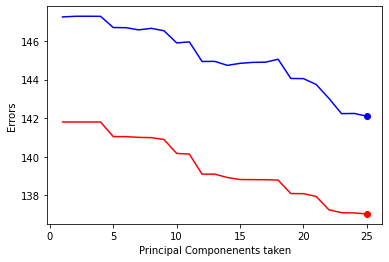

In [32]:
PC_taken = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

min_train_PC = np.argmin(training_errors_PCA)
min_test_PC = np.argmin(testing_errors_PCA)

plt.plot(PC_taken, training_errors_PCA, color="red", label="training errors")
plt.scatter(PC_taken[min_train_PC], training_errors_PCA[min_train_PC], color="red")
plt.plot(PC_taken, testing_errors_PCA, color="blue", label="testing errors")
plt.scatter(PC_taken[min_test_PC], testing_errors_PCA[min_test_PC], color="blue")

plt.xlabel("Principal Componenents taken")
plt.ylabel("Errors")

Text(0, 0.5, 'Variance Captured')

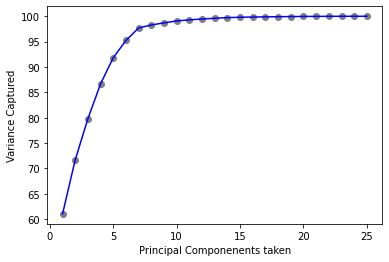

In [33]:
plt.plot(PC_taken, percentage_variance_captured, color="blue")
plt.scatter(PC_taken, percentage_variance_captured, color="grey")
plt.xlabel("Principal Componenents taken")
plt.ylabel("Variance Captured")

2-B Greedy Forward and Backward Feature Selection
Perform 

i) greedy forward feature selection and 

ii) greedy backward feature selection 

to find the subset of features that make the optimal regression model. Find the minimum 
training and testing error of the optimal model (using 1,2,3,...26 features).

Greedy Forward

In [34]:
def calculateErrorValid(test_data, w_train_degree):
    test_pred = np.dot(test_data, w_train_degree)
    d = test_pred - y_valid_data_test
    error = np.dot(d.T,d)

    e_rms = (error/len(test_data))**0.5

    return e_rms

In [43]:
variables_taken = []
variables_taken_name = []
training_errors_greedy_for = []
testing_errors_greedy_for = []

for i in range(1,26):
    
    test_error_greedy = np.inf
    train_error_greedy = np.inf
    x_data_greedy = []
    x_data_greedy_test = []
    
    temp_var = -1
    num_var = np.size(variables_taken)

    for var in variables_taken:
        x_data_greedy.append(x_data[:,var:var+1])
        x_data_greedy_test.append(x_data_test[:,var:var+1])

    for j in range(0,25):

        if(variables_taken.count(j) == 0):
            
            x_data_temp = x_data_greedy.copy()
            x_data_test_temp = x_data_greedy_test.copy()
            # np.concatenate([x_data_greedy,x_data[:,j:j+1].reshape(-1,1)], axis=1)
            x_data_temp.append(x_data[:,j:j+1])
            x_data_test_temp.append(x_data_test[:,j:j+1])
            x_data_req = np.asarray(x_data_temp).T.reshape(-1,num_var+1)
            w_req = np.dot(np.dot(np.linalg.inv(np.dot(x_data_req.T,x_data_req)),x_data_req.T),y_data)

            x_data_test_req = np.asarray(x_data_test_temp).T.reshape(-1,num_var+1)

            model_train_error = calculateError(x_data_req,w_req)
            model_test_error = calculateErrorTest(x_data_test_req, w_req)

            if(model_test_error < test_error_greedy):

                train_error_greedy = model_train_error
                test_error_greedy = model_test_error
                temp_var = j
    
    testing_errors_greedy_for.append(test_error_greedy)
    training_errors_greedy_for.append(train_error_greedy)
    variables_taken.append(temp_var)
    variables_taken_name.append(variables[temp_var])
    print(variables_taken_name,"\n")

greedy_for_df = pd.DataFrame(variables_taken_name,columns=["Variable Taken"])
greedy_for_df.index = np.arange(1, len(greedy_for_df) + 1)
greedy_for_df["Testing Errors"] = testing_errors_greedy_for
greedy_for_df


['RH_out'] 

['RH_out', 'RH_1'] 

['RH_out', 'RH_1', 'RH_7'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T9'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T9', 'T2'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T9', 'T2', 'RH_4'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T9', 'T2', 'RH_4', 'T8'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T9', 'T2', 'RH_4', 'T8', 'T6'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T9', 'T2', 'RH_4', 'T8', 'T6', 'T4'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T9', 'T2', 'RH_4', 'T8', 'T6', 'T4', 'Tdewpoint'] 

['RH_out', 'RH_1', 'RH_7', 'RH_2', 'RH_8', 'Windspeed', 'T3', 'T9', 'T2', 'RH_4', 'T8', 'T6', 'T4', 

,Variable Taken,Testing Errors
1,RH_out,146.779739
2,RH_1,146.049745
3,RH_7,145.112137
4,RH_2,144.875617
5,RH_8,144.676760
6,Windspeed,144.450142
7,T3,144.260919
8,T9,142.362126
9,T2,142.038790
10,RH_4,141.879393


Text(0, 0.5, 'Errors')

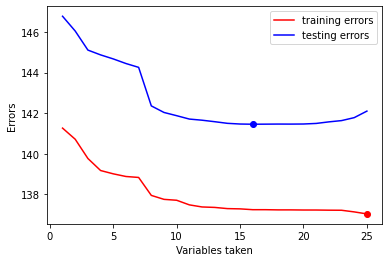

In [42]:
var_taken = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

min_test_forward = np.argmin(testing_errors_greedy_for)
min_train_forward = np.argmin(training_errors_greedy_for)

plt.plot(var_taken, training_errors_greedy_for, color="red", label="training errors")
plt.scatter(var_taken[min_train_forward], training_errors_greedy_for[min_train_forward], color="red")
plt.plot(var_taken, testing_errors_greedy_for, color="blue", label="testing errors")
plt.scatter(var_taken[min_test_forward], testing_errors_greedy_for[min_test_forward], color="blue")
plt.legend(loc='upper right')
plt.xlabel("Variables taken")
plt.ylabel("Errors")

Greedy Backward

In [44]:
variables_removed = []
variables_removed_name = []
training_errors_greedy_back = []
testing_errors_greedy_back = []

for i in range(1,25):

    
    train_error_greedy = np.inf
    test_error_greedy = np.inf
    temp_var = -1

    # temp_removal = variables_removed.copy()
    # x_data_greedy = np.delete(x_data,variables_removed,1)
    # x_data_greedy_test = np.delete(x_data_test,variables_removed,1)
        
    for j in range(0,25):

        if(variables_removed.count(j) == 0):

            temp_removal = variables_removed.copy()
            temp_removal.append(j)
            x_data_temp = np.delete(x_data,temp_removal,1)
            x_data_test_temp = np.delete(x_data_test,temp_removal,1)
            # print(x_data_test_temp.shape)

            w_req = np.dot(np.dot(np.linalg.inv(np.dot(x_data_temp.T,x_data_temp)),x_data_temp.T),y_data)
            # print(w_req)

            model_train_error = calculateError(x_data_temp,w_req)
            model_test_error = calculateErrorTest(x_data_test_temp, w_req)

            if(model_test_error < test_error_greedy):
                
                train_error_greedy = model_train_error
                test_error_greedy = model_test_error
                temp_var = j
    
    
    training_errors_greedy_back.append(train_error_greedy)
    testing_errors_greedy_back.append(test_error_greedy)
    variables_removed.append(temp_var)
    variables_removed_name.append(variables[temp_var])
    print(variables_removed_name,"\n")
    
greedy_back_df = pd.DataFrame(variables_removed_name,columns=["Variable Removed"])
greedy_back_df.index = np.arange(1, len(greedy_back_df) + 1)
greedy_back_df["Testing Errors"] = testing_errors_greedy_back
greedy_back_df

['RH_3'] 

['RH_3', 'RH_6'] 

['RH_3', 'RH_6', 'T8'] 

['RH_3', 'RH_6', 'T8', 'RH_9'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint', 'RH_5'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint', 'RH_5', 'RH_out'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint', 'RH_5', 'RH_out', 'Windspeed'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint', 'RH_5', 'RH_out', 'Windspeed', 'Visibility'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint', 'RH_5', 'RH_out', 'Windspeed', 'Visibility', 'T4'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint', 'RH_5', 'RH_out', 'Windspeed', 'Visibility', 'T4', 'Press_mm_hg'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint', 'RH_5', 'RH_out', 'Windspeed', 'Visibility', 'T4', 'Press_mm_hg', 'T7'] 

['RH_3', 'RH_6', 'T8', 'RH_9', 'rv1', 'T5', 'Tdewpoint', 'RH_5'

,Variable Removed,Testing Errors
1,RH_3,141.783521
2,RH_6,141.637682
3,T8,141.507237
4,RH_9,141.401054
5,rv1,141.374963
6,T5,141.372463
7,Tdewpoint,141.371457
8,RH_5,141.384768
9,RH_out,141.396130
10,Windspeed,141.427886


Text(0, 0.5, 'Errors')

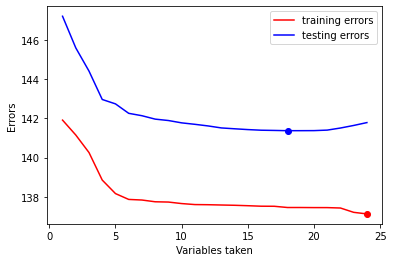

In [41]:
var_taken1 = [24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

min_test_backward = np.argmin(testing_errors_greedy_back)
min_train_backward = np.argmin(training_errors_greedy_back)

plt.plot(var_taken1, training_errors_greedy_back, color="red", label="training errors")
plt.scatter(var_taken1[min_train_backward], training_errors_greedy_back[min_train_backward], color="red")
plt.plot(var_taken1, testing_errors_greedy_back, color="blue", label="testing errors")
plt.scatter(var_taken1[min_test_backward], testing_errors_greedy_back[min_test_backward], color="blue")
plt.legend(loc='upper right')
plt.xlabel("Variables taken")
plt.ylabel("Errors")

2-C Comparative analysis

2-C Comparative Analysis

Perform comparative analysis of the best models obtained using each of the feature selection 
techniques (from 2-A and 2-B) and the performance with the regression model using all the 
features.


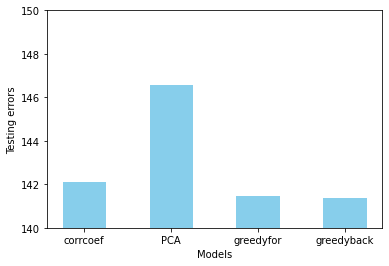

In [39]:
#From above, we call all the values for the 4 best models taken by correlatin coefficients, PCA, greedy forward and greedy backward

XLabels = np.array(['corrcoef', 'PCA', 'greedyfor', 'greedyback'])
YLabels = np.array([testing_errors[min_test], testing_errors_PCA[6], testing_errors_greedy_for[min_test_forward], testing_errors_greedy_back[min_test_backward]])

plt.bar(XLabels, YLabels, color = "skyblue", width = 0.5)
plt.ylim([140, 150])
plt.xlabel('Models')
plt.ylabel('Testing errors')
plt.show()